In [2]:
import csv
import random
import numpy as np
import matplotlib.pyplot as plt

In [1]:
def loadtsvfile(s):
    info=[]
    with open(s) as tsvfile:
        reader = csv.reader(tsvfile,delimiter='\t')
        for row in reader:
            info.append(row)
        info = [[1] + list(map(float, obs)) for obs in info]
        X = [obs[:-1] for obs in info]
        y = [obs[-1] for obs in info]
        return X, y

In [3]:
def sse(X,y, w):
    error = y - X @ w
    return error.T @ error


In [5]:
def normalize(Xy):
    maxima = np.amax(Xy, axis=0)
    D = np.diag(maxima)
    D_inv = np.linalg.inv(D)
    Xy = Xy @ D_inv
    return (Xy, maxima)

In [4]:
def batch_GD(x,y,a,w):
    a /= len(X)
    for epoch in range(1,500):
        loss = y - x @ w
        gradient = x.T @ loss
        w_old = w
        w = w + a * gradient
        if np.linalg.norm(w-w_old) / np.linalg.norm(w) < 0.0005:
            print("Epoch",epoch)
            break
    return w


In [6]:
def stochastic_GD(x,y,a,w):
    random.seed(0)
    indx = list(range(len(x)))
    for epoch in range(1,500):
        random.shuffle(indx)
        w_old = w
        for i in indx:
            loss = y[i] - x[i] @ w
            gradient = loss * x[i].reshape(-1,1)
            w = w + a * gradient
        if np.linalg.norm(w-w_old) / np.linalg.norm(w) < 0.0005:
            print("Epoch",epoch)
            break
    return w

===Stochastic descent===
Weights [[-0.01055236]
 [ 1.00623339]]
Restored weights [[-86.30776373]
 [  0.1092205 ]]


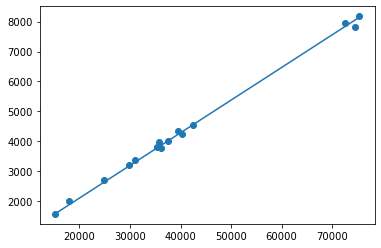

In [7]:
dataS = 'salammbo/salammbo_e_en.tsv'
batch_descent = False # if set to false uses stochastic instead

X,y = loadtsvfile(dataS)
y = np.array([y]).T

X, maxima_X = normalize(X)
y, maxima_y = normalize(y)
maxima = np.concatenate((maxima_X, maxima_y))
alpha = 1.0

w = np.zeros(X.shape[1]).reshape((-1, 1))
if batch_descent:
    print("===Batch descent===")
    w = batch_GD(X, y, alpha, w)
else:
    print("===Stochastic descent===")
    w = stochastic_GD(X, y, alpha, w)
print("Weights", w)
#print("SSE", sse(X, y, w))
maxima = maxima.reshape(-1, 1)
w = maxima[-1, 0] * (w / maxima[:-1, 0:1])
print("Restored weights", w)

x_fig = [X[i][1] * maxima_X[1] for i in range(len(X))]
y_fig = [yi * maxima_y for yi in y]
plt.scatter(x_fig, y_fig)
plt.plot([min(x_fig), max(x_fig)],
        [[1, min(x_fig)] @ w, [1, max(x_fig)] @ w])
plt.show()